In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataVer10 = "review-Vermont-10.json.gz"
dataVer = "review-Vermont.json.gz"
dataMeta = "meta-Vermont.json.gz"

df_meta = pd.read_json(dataMeta, lines=True, compression="gzip")
df_ver = pd.read_json(dataVer, lines=True, compression="gzip")

In [28]:
#merge into one dataframe
df = df_ver.merge(df_meta, on="gmap_id", how="left")

In [29]:
df.head()

,user_id,name_x,time,rating,text,pics,resp,gmap_id,name_y,address,...,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,1.044905e+20,Tia McCarthy,1629987079369,5.0,The Royal Group recently performed standard te...,None,"{'time': 1629988531658, 'text': 'Tia, You rock...",0x89e02445cb9db457:0x37f42bff4edf7a43,Royal Group,"Royal Group, 150 Woodstock Ave, Rutland, VT 05701",...,-72.960497,"[Security system supplier, Fire protection equ...",4.9,148,None,"[[Thursday, 8AM–5PM], [Friday, 8AM–5PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 8AM,"[0x89e0245c4c5c7d2d:0x97bca40a0223d767, 0x89e0...",https://www.google.com/maps/place//data=!4m2!3...
1,1.044905e+20,Tia McCarthy,1629987079369,5.0,The Royal Group recently performed standard te...,None,"{'time': 1629988531658, 'text': 'Tia, You rock...",0x89e02445cb9db457:0x37f42bff4edf7a43,Royal Group,"Royal Group, 150 Woodstock Ave, Rutland, VT 05701",...,-72.960497,"[Security system supplier, Fire protection equ...",4.9,148,None,"[[Thursday, 8AM–5PM], [Friday, 8AM–5PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 8AM,"[0x89e0245c4c5c7d2d:0x97bca40a0223d767, 0x89e0...",https://www.google.com/maps/place//data=!4m2!3...
2,1.120627e+20,Rochelle Weitzner,1626442303453,5.0,I can't say enough great things about The Roya...,None,"{'time': 1626444234168, 'text': 'Morning Roche...",0x89e02445cb9db457:0x37f42bff4edf7a43,Royal Group,"Royal Group, 150 Woodstock Ave, Rutland, VT 05701",...,-72.960497,"[Security system supplier, Fire protection equ...",4.9,148,None,"[[Thursday, 8AM–5PM], [Friday, 8AM–5PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 8AM,"[0x89e0245c4c5c7d2d:0x97bca40a0223d767, 0x89e0...",https://www.google.com/maps/place//data=!4m2!3...
3,1.120627e+20,Rochelle Weitzner,1626442303453,5.0,I can't say enough great things about The Roya...,None,"{'time': 1626444234168, 'text': 'Morning Roche...",0x89e02445cb9db457:0x37f42bff4edf7a43,Royal Group,"Royal Group, 150 Woodstock Ave, Rutland, VT 05701",...,-72.960497,"[Security system supplier, Fire protection equ...",4.9,148,None,"[[Thursday, 8AM–5PM], [Friday, 8AM–5PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 8AM,"[0x89e0245c4c5c7d2d:0x97bca40a0223d767, 0x89e0...",https://www.google.com/maps/place//data=!4m2!3...
4,1.100483e+20,Baxter Holland,1627319568225,5.0,The Royal Group has done work for us over many...,None,"{'time': 1627319913364, 'text': 'Baxter, I tr...",0x89e02445cb9db457:0x37f42bff4edf7a43,Royal Group,"Royal Group, 150 Woodstock Ave, Rutland, VT 05701",...,-72.960497,"[Security system supplier, Fire protection equ...",4.9,148,None,"[[Thursday, 8AM–5PM], [Friday, 8AM–5PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 8AM,"[0x89e0245c4c5c7d2d:0x97bca40a0223d767, 0x89e0...",https://www.google.com/maps/place//data=!4m2!3...


In [30]:
#remove duplicates user_id and gmap_id remove user reviewing a place multiple times
print("Before:", len(df))
df = df.drop_duplicates(subset=['user_id', 'gmap_id'])
print("After:", len(df))

Before: 853549
After: 833086


In [31]:
df.isna().sum()

user_id                160
name_x                   0
time                     0
rating                 160
text                344874
pics                803529
resp                736083
gmap_id                  0
name_y                   0
address               2069
description         467956
latitude                 0
longitude                0
category               192
avg_rating               0
num_of_reviews           0
price               468422
hours               122849
MISC                 83350
state               287435
relative_results     57124
url                      0
dtype: int64

In [32]:
#drop any with none rating
print("Before:", len(df))
df = df.dropna(subset=['rating'])
print("After:", len(df))

Before: 833086
After: 832926


In [33]:
#drop any with none text reviews
print("Before:", len(df))
df = df.dropna(subset=["text"])
print("After:", len(df))

Before: 832926
After: 488052


In [ ]:
#enconding of pricing convert $$$ price to numerical 0 none, 1 = $, 2 = $$, 3 = $$$, 4 = $$$$
df["price"] = df["price"].str.len()

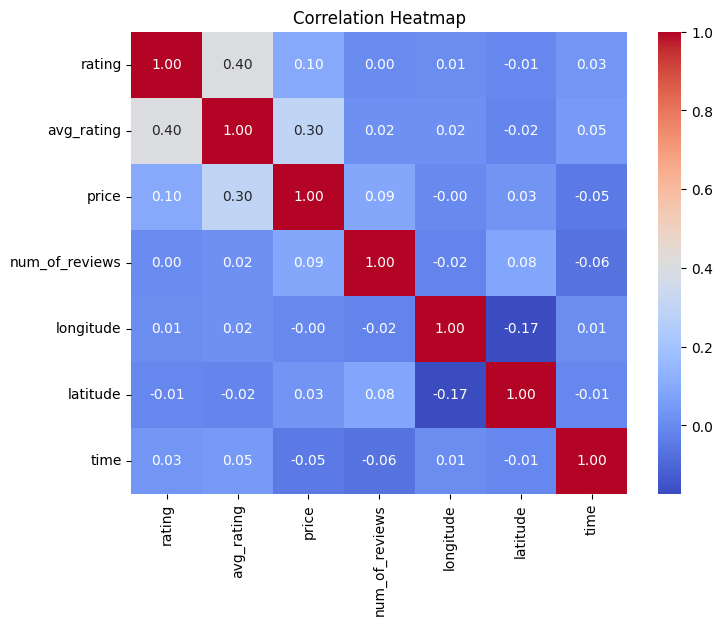

In [35]:
cols = ["rating","avg_rating","price", "num_of_reviews","longitude","latitude","time"] 
corr = df[cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [36]:
# Delete unnecessary columns : name_x, name_y, time, pics, resp, address, relative_results, state, url, latitude, longitude
# Maybe delete : description, num_of_reviews
# ** avg_rating should be recalculated **

useless = ["name_x", "name_y", "time", "pics", "resp", "address", "relative_results", "state", "url", "latitude", "longitude", "num_of_reviews"]
maybe = ["description"]
df = df.drop(columns=useless + maybe)

In [37]:
df.head()

,user_id,rating,text,gmap_id,category,avg_rating,price,hours,MISC
0,1.044905e+20,5.0,The Royal Group recently performed standard te...,0x89e02445cb9db457:0x37f42bff4edf7a43,"[Security system supplier, Fire protection equ...",4.9,NaN,"[[Thursday, 8AM–5PM], [Friday, 8AM–5PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...
2,1.120627e+20,5.0,I can't say enough great things about The Roya...,0x89e02445cb9db457:0x37f42bff4edf7a43,"[Security system supplier, Fire protection equ...",4.9,NaN,"[[Thursday, 8AM–5PM], [Friday, 8AM–5PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...
4,1.100483e+20,5.0,The Royal Group has done work for us over many...,0x89e02445cb9db457:0x37f42bff4edf7a43,"[Security system supplier, Fire protection equ...",4.9,NaN,"[[Thursday, 8AM–5PM], [Friday, 8AM–5PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...
6,1.061744e+20,5.0,The Royal Group was fantastic to work with. I ...,0x89e02445cb9db457:0x37f42bff4edf7a43,"[Security system supplier, Fire protection equ...",4.9,NaN,"[[Thursday, 8AM–5PM], [Friday, 8AM–5PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...
8,1.062387e+20,5.0,"Have used in different houses, installing mult...",0x89e02445cb9db457:0x37f42bff4edf7a43,"[Security system supplier, Fire protection equ...",4.9,NaN,"[[Thursday, 8AM–5PM], [Friday, 8AM–5PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...


In [38]:
df.to_json("clean_Vermont.json.gz", orient="records", lines=True, compression="gzip")